<h1 style="color:orange">Sous-partie 1</h1>


## 0. Setup technique + prétraitement rapide

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### En inspectant chaque colonne j'ai remarqué des valeurs NaN ou erronnées dans certaines colonnes. Je vais par exemple effacer la catégorie '1.9' car je vais utiliser cette colonne dans la démarche. Mais je laisse certaines valeurs NaN dans d'autres colonnes que je ne vais pas utiliser.

In [2]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [3]:
df = df[df["Category"] != "1.9"]


<h2>1. Présentation de l'état global du marché</h2>

#### L'objectif de cette première partie est de visualiser les données afin de faciliter leur compréhension pour notre client. Un schéma vaut mieux que mille mots.

In [4]:
print("Il y a",df['App'].nunique(),"applications différentes dans ce jeu de données. Répartis en",df['Category'].nunique(),"catégories différentes.")

Il y a 9659 applications différentes dans ce jeu de données. Répartis en 33 catégories différentes.


#### Nous allons visualiser répartition des applications par catégories pour se rendre compte des plus gros secteurs et des niches.

C:\Users\paulv\AppData\Local\Temp\ipykernel_22164\850631128.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y="Category", x="App Count", data=category_counts, palette=category_counts["Color"].tolist())


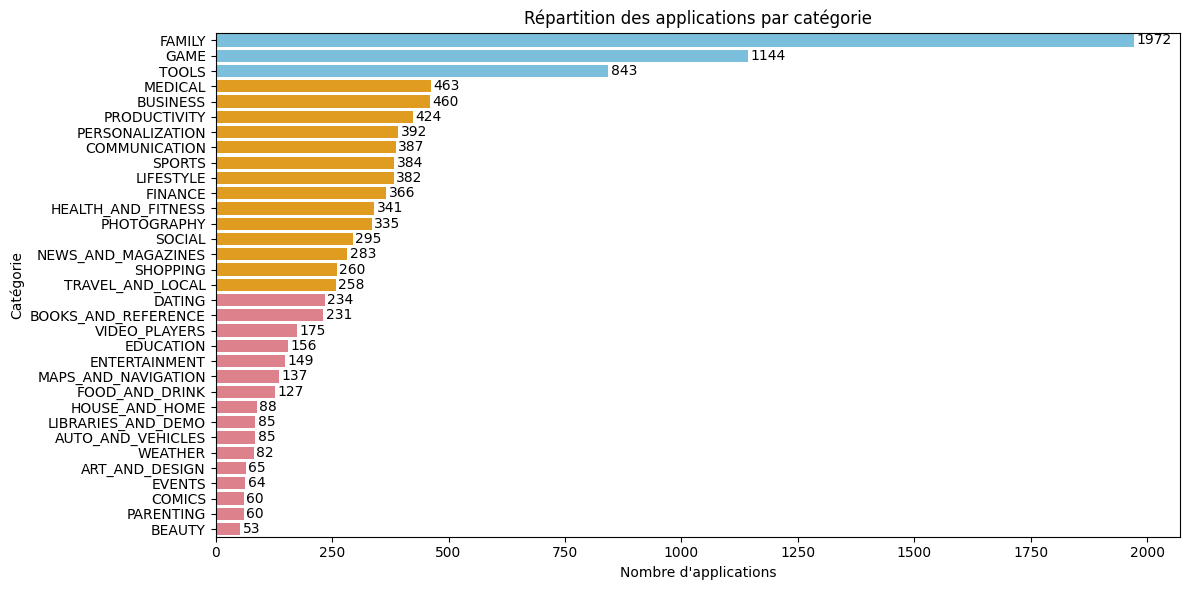

In [5]:
category_counts = df["Category"].value_counts().reset_index()
category_counts.columns = ["Category", "App Count"]
category_counts = category_counts.sort_values("App Count", ascending=False)

def assign_color(count):
    if count > 500:
        return "#6cc5ec"
    elif count >= 250:
        return "orange"
    else:
        return "#ec7282"

category_counts["Color"] = category_counts["App Count"].apply(assign_color)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(y="Category", x="App Count", data=category_counts, palette=category_counts["Color"].tolist())

plt.title("Répartition des applications par catégorie")
plt.xlabel("Nombre d'applications")
plt.ylabel("Catégorie")

for bar in barplot.patches:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()


#### De même, nous allons nous représenter le publique cible des applications.

C:\Users\paulv\AppData\Local\Temp\ipykernel_22164\3761347519.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y="Content Rating", x="App Count", data=content_counts, palette=content_counts["Color"].tolist())


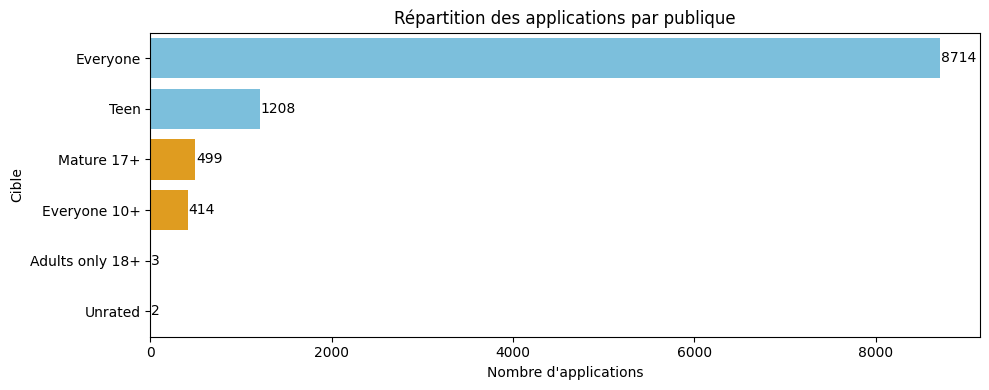

In [6]:
content_counts = df["Content Rating"].value_counts().reset_index()
content_counts.columns = ["Content Rating", "App Count"]
content_counts = content_counts.sort_values("App Count", ascending=False)

def assign_color(count):
    if count > 500:
        return "#6cc5ec"
    elif count >= 250:
        return "orange"
    else:
        return "#ec7282"

content_counts["Color"] = content_counts["App Count"].apply(assign_color)

plt.figure(figsize=(10, 4))
barplot = sns.barplot(y="Content Rating", x="App Count", data=content_counts, palette=content_counts["Color"].tolist())

plt.title("Répartition des applications par publique")
plt.xlabel("Nombre d'applications")
plt.ylabel("Cible")

for bar in barplot.patches:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2, int(width), va='center')

plt.tight_layout()
plt.show()


#### Ensuite, il est intéressant de voir la répartition des applications entre un model gratuit et un model payant.

In [7]:
type_counts = df["Type"].value_counts().reset_index()
type_counts.columns = ["Type", "Count"]

fig = px.pie(
    type_counts,
    names="Type",
    values="Count",
    title="Répartition des applications gratuites vs payantes",
    color="Type",
    color_discrete_map={
        "Free": "#6cc5ec",
        "Paid": "#ec7282"
    },
)

fig.update_traces(textinfo="percent+label", pull=[0.05, 0]) 

fig.update_layout(
    showlegend=True,
    font=dict(size=14)
)

fig.show()


#### Et ensuite, la répartition du nombre de téléchargement. Ce qui va nous indiquer la répartition du marché.

C:\Users\paulv\AppData\Local\Temp\ipykernel_22164\1494242398.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




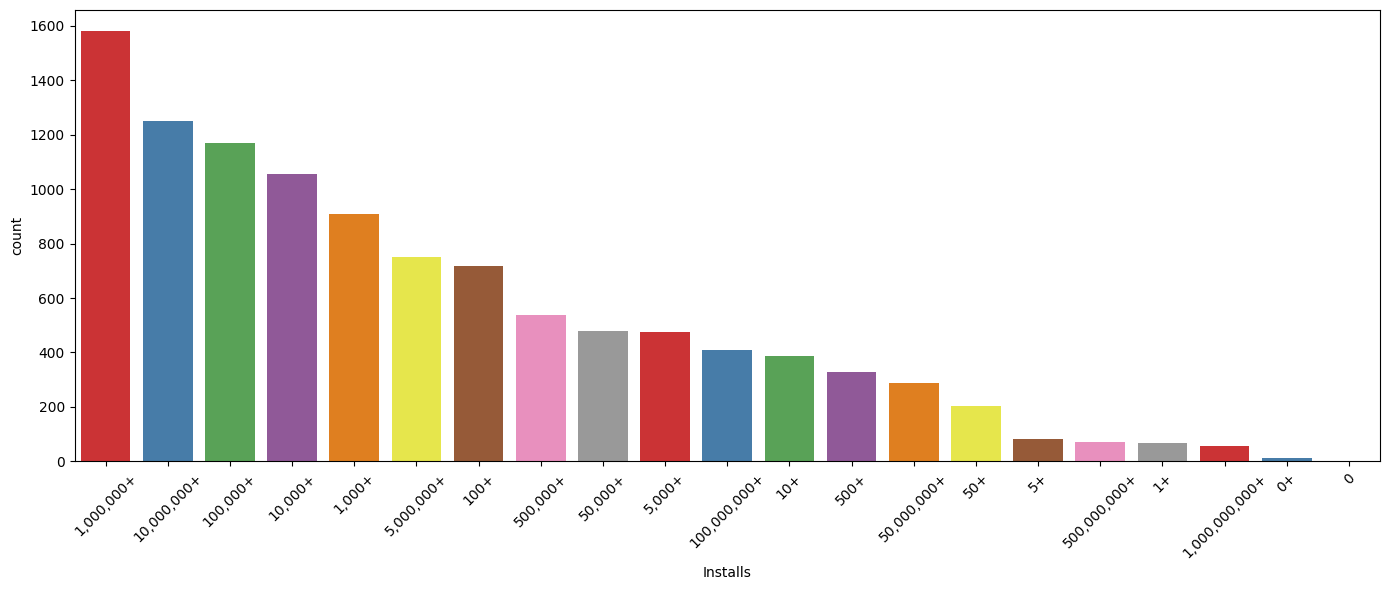

In [8]:
order = df['Installs'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(14, 6))
sns.countplot(x="Installs", data=df, palette="Set1", order=order)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df = df[df["Installs"].str.contains(r"^\d", na=False)] #Pour supprimer les colonnes qui possèdent potentiellement des erreurs
df["Installs_clean"] = df["Installs"].str.replace(r"[+,]", "", regex=True).astype(int)

mean_installs = df["Installs_clean"].mean()
median_installs = df["Installs_clean"].median() ### Vérifier 

print(f"Téléchargements moyens : {mean_installs:,.0f}")
print(f"Téléchargements médians : {median_installs:,.0f}")


Téléchargements moyens : 15,464,339
Téléchargements médians : 100,000


#### Le marché des apps est dominé par une minorité de blockbusters. La majorité des applications restent en dessous de 100 000 téléchargements, ce qui indique un marché compétitif et inégalitaire.

## 2. Détecter les segments porteurs

#### L'objectif est de trouver une ou plusieurs catégories qui peuvent représenter un bon secteur d'investissement.

In [10]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [11]:
df[pd.isna(df["Rating"])].value_counts()

Series([], Name: count, dtype: int64)

In [12]:
df = df.dropna(subset=['Rating'])

#### Pour la suite, nous allons regrouper les données par catégorie afin de calculer le nombre moyen de téléchargements par application, le nombre d'applications, ainsi que la note moyenne par application.

In [13]:
segment_stats = df.groupby("Category").agg({
    "App": "count",
    "Rating": "mean",
    "Installs_clean": "median"
}).rename(columns={
    "App": "App Count",
    "Rating": "Average Rating",
    "Installs_clean": "Median Installs"
}).reset_index()


#### Puis on trace le nombre de téléchargement en fonction de la note moyenne. 

In [14]:
fig = px.scatter(
    segment_stats,
    x="Average Rating",
    y="Median Installs",
    size="App Count",
    color="Category",
    hover_name="Category",
    size_max=60,
    log_y=True,
    title="Analyse des segments par note moyenne et popularité"
)

fig.update_layout(
    xaxis_title="Note moyenne",
    yaxis_title="Téléchargements médians (log)",
    plot_bgcolor='white',
    font=dict(size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()


<h4>
Ce graphique met en évidence l'équilibre entre la popularité et la satisfaction des utilisateurs. Les catégories positionnées en haut à droite représentent des segments à fort potentiel d'investissement, alliant forte adoption et excellente évaluation. À l'inverse, les points situés en bas à gauche méritent une analyse approfondie, car ils traduisent une faible traction et une satisfaction utilisateur limitée.
</h4>


### Identification secteur court terme/ROI

In [15]:
rating_threshold = 4.3
installs_threshold = 75000

segment_stats["Pépite"] = (
    (segment_stats["Average Rating"] >= rating_threshold) &
    (segment_stats["Median Installs"] >= installs_threshold)
)

segment_stats["Couleur"] = segment_stats["Pépite"].map({
    True: "#6cc5ec",   
    False: "#ec7282"   
})

fig = px.scatter(
    segment_stats,
    x="Average Rating",
    y="Median Installs",
    size="App Count",
    color="Couleur",
    hover_name="Category",
    color_discrete_map="identity",
    size_max=60,
    log_y=True,
    title="Stratégie : court terme / ROI"
)

fig.add_shape(
    type="line",
    x0=rating_threshold, x1=rating_threshold,
    y0=segment_stats["Median Installs"].min(), y1=segment_stats["Median Installs"].max(),
    line=dict(color="#ec7282", dash="dash"),
)

fig.add_shape(
    type="line",
    y0=installs_threshold, y1=installs_threshold,
    x0=segment_stats["Average Rating"].min(), x1=segment_stats["Average Rating"].max(),
    line=dict(color="#ec7282", dash="dash"),
)

fig.update_traces(marker_symbol="circle")
fig.update_layout(
    xaxis_title="Note moyenne",
    yaxis_title="Téléchargements médians (log)",
    plot_bgcolor='white',
    font=dict(size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=False
)

fig.show()


#### Les catégories PARENTING, ART_AND_DESIGN, EDUCATION, BOOKS_AND_REFERENCE et PERSONALIZATION sont positionnées dans le quadrant supérieur droit du graphique, combinent une excellente satisfaction utilisateur avec une forte popularité, ce qui en fait des segments stratégiques à fort potentiel, idéaux pour un investissement à court terme ou une prise de position dominante sur des marchés déjà réceptifs.



In [16]:
rating_threshold = 4.3
installs_threshold = 75000

segment_stats["Niche Qualitative"] = (
    (segment_stats["Average Rating"] >= rating_threshold) &
    (segment_stats["Median Installs"] < installs_threshold)
)

segment_stats["Couleur"] = segment_stats["Niche Qualitative"].map({
    True: "#6cc5ec",
    False: "#ec7282"
})

fig = px.scatter(
    segment_stats,
    x="Average Rating",
    y="Median Installs",
    size="App Count",
    color="Couleur",
    hover_name="Category",
    color_discrete_map="identity",
    size_max=60,
    log_y=True,
    title="Stratégie : identifier les niches qualitatives"
)

fig.add_shape(
    type="line",
    x0=rating_threshold, x1=rating_threshold,
    y0=segment_stats["Median Installs"].min(), y1=segment_stats["Median Installs"].max(),
    line=dict(color="#6cc5ec", dash="dash"),
)

fig.add_shape(
    type="line",
    y0=installs_threshold, y1=installs_threshold,
    x0=segment_stats["Average Rating"].min(), x1=segment_stats["Average Rating"].max(),
    line=dict(color="#6cc5ec", dash="dash"),
)

fig.add_annotation(
    x=rating_threshold + 0.05,
    y=installs_threshold / 10,
    showarrow=False,
    font=dict(color="blue", size=14),
    bgcolor="rgba(0, 0, 255, 0.05)"
)

fig.update_traces(marker_symbol="circle")
fig.update_layout(
    xaxis_title="Note moyenne",
    yaxis_title="Téléchargements médians (log)",
    plot_bgcolor='white',
    font=dict(size=14),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    showlegend=False
)

fig.show()


<h4>La catégorie EVENT, située dans le quadrant inférieur droit du graphique, affiche une excellente note moyenne malgré une popularité encore modeste, ce qui en fait une niche qualitative. Elle représente une opportunité intéressante pour une stratégie de différenciation ou un investissement early-stage sur un marché prometteur mais encore sous-exploité.</h3>


<h2>3. Identification des catégories les plus favorables par niche</h2>

In [17]:
columns = ["Category", "App Count", "Average Rating", "Median Installs"]

court_terme = segment_stats[segment_stats["Category"].isin(["PARENTING", "ART_AND_DESIGN", "EDUCATION","BOOKS_AND_REFERENCE", "PERSONALIZATION"])][columns]
differenciation = segment_stats[segment_stats["Category"].isin(["EVENTS"])][columns]

### Comparaison des catégories par niche

#### Pour identifier la catégorie la plus pertinente dans chaque niche, nous comparons les trois segments retenus à partir de trois critères : la note moyenne, le nombre médian de téléchargements et le nombre d'applications dans la catégorie. 

#### Ces critères sont normalisés et pondérés pour calculer un score global. On utilise un coefficient de 0.4 pour le rating moyen, 0.4 pour le nombre d'installations et 0.2 pour la saturation du secteur (1 - nombre d'app normalisé). La catégorie obtenant le meilleur score est retenue comme la plus stratégique à explorer.

### Score = C1 × Rating normalisé + C2 × Installs normalisé + C3 × (1−App count normalisé)

In [18]:
from sklearn.preprocessing import MinMaxScaler

C1 = 0.4
C2 = 0.4 
C3 = 0.2

def compute_score(df):
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[["Rating_norm", "Installs_norm", "AppCount_norm"]] = scaler.fit_transform(
        df[["Average Rating", "Median Installs", "App Count"]]
    )
    df_scaled["Score"] = (
        df_scaled["Rating_norm"] * C1 +
        df_scaled["Installs_norm"] * C2 +
        (1 - df_scaled["AppCount_norm"]) * C3
    )
    return df_scaled.sort_values("Score", ascending=False)

best_court_terme = compute_score(court_terme)



In [19]:
best_court_terme

,Category,App Count,Average Rating,Median Installs,Rating_norm,Installs_norm,AppCount_norm,Score
8,EDUCATION,155,4.389032,1000000.0,1.000000,1.0,0.397727,0.920455
0,ART_AND_DESIGN,62,4.358065,100000.0,0.652174,0.0,0.045455,0.451779
3,BOOKS_AND_REFERENCE,178,4.346067,100000.0,0.517424,0.0,0.484848,0.310000
22,PARENTING,50,4.300000,100000.0,0.000000,0.0,0.000000,0.200000
23,PERSONALIZATION,314,4.335987,100000.0,0.404205,0.0,1.000000,0.161682


#### Le calcul des scores nous permet d'identifier deux catégories dans lequelles se pencher plus en détail : EDUCATION (score 0.92) et EVENTS

## 4. Focus sur les applications des catégories EDUCATION et EVENTS
#### L'objectif est de déterminer des lots d'application qui représente un ensemble intéressant pour investir

## A. Model payant ou gratuit ?

In [20]:
df_edu = df[df['Category'] == 'EDUCATION'].copy()
df_evt = df[df['Category'] == 'EVENTS'].copy()

## Focus sur la catégorie Education

In [21]:
df_edu["App"].value_counts()

App
Duolingo: Learn Languages Free                        4
Learn languages, grammar & vocabulary with Memrise    4
Quizlet: Learn Languages & Vocab with Flashcards      4
Rosetta Stone: Learn to Speak & Read New Languages    4
Khan Academy                                          3
                                                     ..
Blinkist - Nonfiction Books                           1
Sago Mini Hat Maker                                   1
Fuzzy Numbers: Pre-K Number Foundation                1
Toca Life: City                                       1
Toca Life: Hospital                                   1
Name: count, Length: 118, dtype: int64

#### On observe la présence de doublons dans les applications, représentant différentes occurrences très similaires. Après vérification, la principale différence entre ces doublons réside dans le nombre de reviews. Par souci de cohérence et afin de conserver la version la plus représentative de l'engagement utilisateur, nous choisissons de ne garder que celle ayant le plus grand nombre de reviews.

In [22]:
df_edu = df_edu.sort_values('Reviews', ascending=False)
df_edu = df_edu.drop_duplicates(subset='App', keep='first')

df_edu['App'].duplicated().sum()

np.int64(0)

In [23]:
df_edu["Type"].value_counts()

Type
Free    114
Paid      4
Name: count, dtype: int64

In [24]:
ratings = df_edu.groupby('Type')['Rating'].mean()
print(f"Les moyennes de notes sont :\n- Apps gratuites : {ratings['Free']:.2f}\n- Apps payantes : {ratings['Paid']:.2f}")

Les moyennes de notes sont :
- Apps gratuites : 4.35
- Apps payantes : 4.75


In [25]:
installs = df_edu.groupby('Type')['Installs_clean'].mean()
print(f"Nombre moyen d'installations :\n- Apps gratuites : {int(installs['Free']):,}\n- Apps payantes : {int(installs['Paid']):,}")

Nombre moyen d'installations :
- Apps gratuites : 3,089,912
- Apps payantes : 150,500


In [26]:
df_edu['Reviews'] = df_edu['Reviews'].str.replace(',', '').astype(int)
df_edu['Engagement'] = df_edu['Reviews'] / df_edu['Installs_clean']
engagement = df_edu.groupby('Type')['Engagement'].mean()
print(f"Taux d'engagement moyen :\n- Apps gratuites : {engagement['Free']:.2%}\n- Apps payantes : {engagement['Paid']:.2%}")

Taux d'engagement moyen :
- Apps gratuites : 3.00%
- Apps payantes : 3.24%


#### On trace la distribution des notes par modèle économique

In [27]:
fig = px.box(
    df_edu,
    x='Type',
    y='Rating',
    points='all', 
    title="Distribution des notes - EDUCATION (Free vs Paid)",
    labels={'Rating': 'Note', 'Type': 'Modèle économique'}
)
fig.show()


#### Et la distribution du nombre d'installation par modèle économique.

In [28]:
fig = px.box(
    df_edu,
    x='Type',
    y='Installs_clean',
    points='all',
    title="Distribution des installations - EDUCATION (échelle log)",
    labels={'Installs_clean': 'Installations', 'Type': 'Modèle économique'}
)

fig.update_yaxes(type='log')
fig.show()


### Interprétation

#### L’analyse des applications dans la catégorie EDUCATION révèle que les apps payantes présentent en moyenne une meilleure note utilisateur, ce qui traduit une qualité perçue plus élevée. Toutefois, les apps gratuites affichent des volumes d’installations nettement supérieurs, soulignant leur potentiel de diffusion massive. 

#### Étant donné que la catégorie Education se trouve dans le segment stratégique d'investissement à court terme / fort ROI, il est plus judicieux de prioriser les applications gratuites à fort volume d’utilisateurs, car elles bénéficient d’une large diffusion et d’un potentiel de monétisation rapide via des modèles freemium, publicitaires ou d’abonnement. De plus, une application d’éducation est par nature conçue pour être utilisée régulièrement et sur le long terme (apprentissage progressif, exercices quotidiens, révisions…), ce qui favorise une récurrence d’usage élevée et donc une rétention client solide, essentielle pour maximiser le retour sur investissement.

#### Cela dit, les applications payantes, bien que moins téléchargées, présentent une meilleure qualité perçue (notes plus élevées) et peuvent représenter des opportunités pertinentes dans des niches éducatives spécialisées ou professionnelles, avec des utilisateurs plus engagés et prêts à payer pour de la valeur.

#### Nous allons essayer d'identifier une ou plusieurs applications pour chaque modèles économiques

#### Pour cela, nous recalculons un score basé sur la note moyenne et le nombre d’installations.

In [29]:
scaler = MinMaxScaler()

df_edu[['Rating_norm', 'Installs_norm']] = scaler.fit_transform(df_edu[['Rating', 'Installs_clean']])
df_edu['Attractiveness_Score'] = df_edu['Rating_norm'] * 0.5 + df_edu['Installs_norm'] * 0.5

top_free = df_edu[df_edu['Type'] == 'Free'].sort_values('Attractiveness_Score', ascending=False).head(2)
top_paid = df_edu[df_edu['Type'] == 'Paid'].sort_values('Attractiveness_Score', ascending=False).head(1)


In [30]:
print("Top apps gratuites :")
for app in top_free[['App', 'Rating', 'Installs_clean']].values:
    print(f"- {app[0]} → Note : {app[1]}, Installs : {int(app[2]):,}")

print("\nTop apps payantes :")
for app in top_paid[['App', 'Rating', 'Installs_clean']].values:
    print(f"- {app[0]} → Note : {app[1]}, Installs : {int(app[2]):,}")

Top apps gratuites :
- Duolingo: Learn Languages Free → Note : 4.7, Installs : 100,000,000
- Learn Japanese, Korean, Chinese Offline & Free → Note : 4.9, Installs : 1,000,000

Top apps payantes :
- Sago Mini Hat Maker → Note : 4.9, Installs : 1,000


#### Nous recommandons de porter votre attention sur les applications gratuites **"Duolingo: Learn Languages Free"** et **"Learn Japanese, Korean, Chinese Offline & Free"**. Et sur l'application payante **"Sago Mini Hat Maker"**

## Focus sur la catégorie EVENT

#### On va appliquer la même méthodologie que pour la catégorie EDUCATION

In [31]:
df_evt["App"].value_counts()

App
All Events in City                                   1
Ticketmaster Event Tickets                           1
Reminder                                             1
Birdays - Birthday reminder                          1
StubHub - Tickets to Sports, Concerts & Events       1
Fever                                                1
DroidAdmin for Android - Advice                      1
SeatGeek – Tickets to Sports, Concerts, Broadway     1
my4D                                                 1
Vivid Seats – Event Tickets                          1
Name days                                            1
LBB - Find New & Unique Things To Do Around You      1
Happy Birthday Songs Offline                         1
Series Valley of the Wolves full of part             1
Mummatikabalkuragi                                   1
Gametime - Tickets to Sports, Concerts, Theater      1
PTI Flex Maker, Photo Frame Editor & Songs 2018      1
Wipe out                                             1
Birthd

In [32]:
df_evt["Type"].value_counts()

Type
Free    45
Name: count, dtype: int64

#### Il n'y a donc pas d'applications EVENT payante, nous allons essayer d'étudier quelles sont les applications les plus intéressantes. On peut aller un peu plus vite ici

In [33]:
fig = px.box(
    df_evt,
    x='Type',
    y='Rating',
    points='all', 
    title="Distribution des notes - EVENT",
    labels={'Rating': 'Note'}
)
fig.show()


In [34]:
fig = px.box(
    df_evt,
    x='Type',
    y='Installs_clean',
    points='all',
    title="Distribution des installations - EVENT (échelle log)",
)

fig.update_yaxes(type='log')
fig.show()


In [35]:
scaler = MinMaxScaler()

df_evt[['Rating_norm', 'Installs_norm']] = scaler.fit_transform(df_evt[['Rating', 'Installs_clean']])
df_evt['Attractiveness_Score'] = df_evt['Rating_norm'] * 0.5 + df_evt['Installs_norm'] * 0.5

top_free = df_evt[df_evt['Type'] == 'Free'].sort_values('Attractiveness_Score', ascending=False).head(2)


In [36]:
print("Top apps gratuites :")
for app in top_free[['App', 'Rating', 'Installs_clean']].values:
    print(f"- {app[0]} → Note : {app[1]}, Installs : {int(app[2]):,}")



Top apps gratuites :
- Ticketmaster Event Tickets → Note : 4.0, Installs : 5,000,000
- StubHub - Tickets to Sports, Concerts & Events → Note : 4.0, Installs : 5,000,000


#### Nous recommandons de vous pencher sur les applications **"Ticketmaster Event Tickets"** et **"StubHub - Tickets to Sports, Concerts & Events"**

## 5. Éventuelles failles ou risques à considérer

#### 5.1 Présence d’applications anciennes ou peu maintenues

De nombreuses applications, bien que très installées, n’ont pas été mises à jour depuis plusieurs années. Elles peuvent encore générer du trafic mais ne représentent plus une opportunité active. Cela biaise les scores si on n'intègre pas la dimension temporelle.

C'est par exemple le cas avec cette application de la catégorie EDUCATION, avec +1,000,000 de téléchargement et 4.3 de rating. Mais cela ne représente pas un bon investissement (en se basant sur le fait que le dataset date de 2018).

In [37]:
df_edu[df_edu["Last Updated"] == "August 22, 2015"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_clean,Engagement,Rating_norm,Installs_norm,Attractiveness_Score
754,C++ Programming,EDUCATION,4.3,11904,1.8M,"1,000,000+",Free,0,Everyone,Education,"August 22, 2015",2.0,2.3 and up,1000000,0.011904,0.571429,0.00999,0.290709


#### 5.2  Données issues d'une source unique (Google Play Store)
L’analyse repose uniquement sur les données publiques disponibles sur le Play Store. Aucune donnée interne (revenu réel, rétention journalière, coût d’acquisition client) n’est accessible, ce qui limite l’évaluation fine du ROI.

#### 5.3 Indicateurs indirects de performance
Le score construit repose sur des variables comme la note moyenne, les installations et les reviews. Ces éléments ne traduisent pas nécessairement la rentabilité réelle ou la satisfaction long terme des utilisateurs.

#### 5.4 Approche simplifiée du modèle économique
L’analyse distingue les apps Free vs Paid, sans intégrer la complexité des modèles hybrides : freemium, abonnements, achats in-app. De ce fait, la valorisation du potentiel économique reste partielle.

#### 5.5 Pas de dynamique temporelle
L’étude ne prend pas en compte l’évolution des installations, des notes ou des mises à jour dans le temps. Cela limite la capacité à identifier les tendances ou les apps en forte croissance.

## Conclusion

L’analyse menée nous a permis d’obtenir un aperçu global du marché des applications mobiles en 2018. Elle a conduit à l’identification de deux axes stratégiques d’investissement : le court terme à fort retour sur investissement et l’approche qualitative axée sur la valeur perçue.
À partir de ces orientations, nous avons mis en évidence les catégories les plus attractives, puis, à l’aide de scores d’attractivité combinant données quantitatives et critères d’engagement, nous avons pu isoler plusieurs applications prometteuses pour un investissement ciblé.

Il faut tout de même prendre du recul sur cette analyse. Les données que nous avons utilisées restent peu suffisantes pour évaluer pleinement la rentabilité réelle des applications. En effet, elles ne fournissent aucune information sur les revenus générés, le coût d’acquisition utilisateur, la durée de rétention, ou encore la stratégie de monétisation mise en place. De plus, l’absence de données temporelles limite notre capacité à détecter les tendances de croissance ou de déclin. Ainsi, cette étude constitue une première étape d’exploration stratégique, mais devrait idéalement être complétée par une analyse financière plus approfondie et des données comportementales réelles.

<h1 style="color:orange">Sous-partie 2 - Pour aller plus loin</h1>

### La conclusion est une superbe introduction à notre sous-partie 2 : comment enrichir le jeu de données actuel ? 

### 1. Récupérer les avis des utilisateurs

Il serait très intéressant d’enrichir notre jeu de données en récupérant les avis réels des utilisateurs afin de mieux comprendre leurs retours, ressentis et remarques générales. Cela permettrait d'aller au-delà des simples notes pour identifier des signaux faibles ou des insights comportementaux.

En analysant ces avis, on pourrait utiliser des modèles NLP d’analyse de sentiment, ou même faire appel à un LLM pour générer une synthèse des remarques récurrentes. On pourrait ainsi identifier automatiquement des commentaires comportant des éléments pertinents comme : "Depuis la dernière mise à jour, j’ai pris l’abonnement payant" ou "J’ai recommandé cette application à ma famille". Ces extraits révèlent des informations précieuses sur la monétisation, la rétention ou le bouche-à-oreille.

Pour collecter les avis directement depuis le Google Play Store, plusieurs options sont possibles :

#### A. Utiliser un service API (freemium ou payant)
Des services comme Outscraper proposent des abonnements permettant d’accéder aux reviews de n’importe quelle application du Google Play Store. L’API fonctionne par nom d’app, et retourne un JSON contenant les avis structurés (texte, date, note, etc.). Il est également possible d’exporter ces données au format CSV/XLSX depuis leur interface web. Mon idée serait de créer un script Python qui parcourt les noms d’applications présents dans notre dataset (en évitant les doublons), effectue un appel à l’API pour récupérer jusqu’à 1 000 reviews par application, puis traite le JSON pour intégrer les avis dans une nouvelle colonne "Users_reviews" au format "avis 1 - avis 2 - ..." afin de rendre cette donnée directement exploitable par un modèle de langage (LLM) pour de l’analyse de sentiment, de la synthèse, ou de la détection de signaux spécifiques.

Les avantages de cette solution résident dans sa simplicité : il suffit de savoir effectuer un appel API et de traiter un fichier JSON, ce qui la rend facilement intégrable dans un pipeline Python classique. De plus, l’utilisation d’un service comme Outscraper donne accès à un support client, ce qui peut s’avérer précieux en cas de difficulté technique, de limitation sur les quotas, ou si la qualité des données retournées nécessite clarification ou ajustement.

Le principal inconvénient de ce type de solution reste son coût lorsqu'on souhaite accéder à un volume conséquent de données. D’après le simulateur de tarification d’Outscraper, la récupération de 1 000 reviews coûte environ 2$. Si l’on applique ce tarif à l’ensemble des applications présentes dans notre dataset, on arrive rapidement à un budget avoisinant les 18 500 $, ce qui est — à mon sens — excessif pour une simple analyse de sentiment à grande échelle. Bien sûr, on pourrait choisir de récupérer un échantillon plus réduit (par exemple 100 avis par app), mais cela limiterait la représentativité des retours utilisateurs et réduirait fortement la fiabilité de l’interprétation.

#### B. Scraper nous-mêmes les données du Google Play Store
Il est également envisageable de récupérer les avis utilisateurs en développant notre propre script de scraping, à l’aide de bibliothèques Python comme Selenium et BeautifulSoup. Le processus serait globalement similaire à celui d’un appel API, mais bien plus technique à mettre en œuvre.

L’avantage principal de cette solution réside dans son coût très faible, voire inexistant, et dans la flexibilité qu’elle offre : on pourrait personnaliser notre script pour scraper non seulement les reviews, mais aussi d’autres informations disponibles sur les pages d’applications.

En revanche, cette méthode présente plusieurs inconvénients. Le plus notable est le risque de blocage de la part de Google, qui ne permet pas officiellement ce type de collecte automatisée. Pour contourner ce problème, il faudrait mettre en place un système de rotation de proxy ou d’user-agents, ce qui augmente la complexité et le coût. De plus, ce type de solution est fragile dans le temps : une simple modification du code HTML côté Google Play pourrait rendre notre script inutilisable, rendant difficile toute industrialisation ou mise en production viable.

### 2. Mettre en place un suivi temporel des métriques clés

Une autre piste d’enrichissement consisterait à mettre en place un système de suivi temporel des données pour chaque application du dataset. L’idée serait de récupérer régulièrement (par exemple chaque semaine) les principales métriques disponibles publiquement sur le Google Play Store — telles que le nombre d’installations, la note moyenne, ou encore le nombre de reviews — afin de construire une série temporelle par application. Chaque collecte serait stockée avec un timestamp dans une base de données, ce qui permettrait ensuite d’analyser l’évolution de chaque app dans le temps.

L’intérêt de cette approche est qu’elle permettrait de détecter des dynamiques de croissance ou de déclin, d’identifier des pics d’intérêt suite à une mise à jour ou une campagne marketing, ou encore de repérer des signaux faibles révélant un ralentissement progressif. Ces informations sont précieuses pour un investisseur, car elles aident à intervenir au bon moment, en misant sur des apps en pleine ascension ou en évitant celles en perte de vitesse.

L’inconvénient principal réside dans la mise en place d’une infrastructure de collecte continue, qui nécessite un minimum d’automatisation et de stockage. De plus, cette méthode ne donne des résultats intéressants qu’à condition d’avoir une granularité suffisante et des données historiques régulières — ce que ne permet pas le dataset statique dont nous disposons actuellement. Cela implique donc de projeter ce système sur plusieurs semaines ou mois.

### 3. Estimer les revenus générés par les applications

Une autre piste d’enrichissement pertinente consisterait à intégrer des estimations de revenus pour chaque application, afin de compléter les KPIs publics (comme les notes ou les installations) par des données plus pertinentes pour le côté business, telles que le chiffre d’affaires, le nombre d’abonnements actifs ou encore les achats in-app. Cela permettrait d’avoir une idée plus concrète de la performance économique réelle d’une app, et donc de son potentiel de rentabilité.

Pour cela, deux approches sont envisageables :
- La première repose sur l’utilisation de bases de données spécialisées comme Sensor Tower, Data.ai ou AppMagic, qui proposent des API payantes permettant de récupérer ce type d’estimations pour un large catalogue d’apps.
- La seconde approche, plus artisanale, consiste à estimer les revenus à partir du prix de l’app et du nombre d’installations, en prenant soin d’intégrer un taux de conversion réaliste (pour les achats in-app ou les abonnements).

L’avantage de cette démarche est évident : elle permettrait de rapprocher les données utilisateurs des données financières, ce qui est essentiel dans une logique d’investissement. En revanche, ces données sont souvent payantes, et leur fiabilité peut varier selon la source. Sans accès API ou accord de l’éditeur, il est également difficile d’obtenir des chiffres précis ou vérifiables. Cela en limite donc l’usage à des analyses de scoring ou de priorisation, mais rarement à des décisions d’investissement définitives.


<h1 style="color:orange">Partie 2 - SQL</h1>

### Question 1 : Le nombre d’application téléchargées plus de 100 000 fois

SELECT COUNT(*)

FROM application 

WHERE download>100000;

### Question 2 : La note moyenne de l’application « Notilus »

SELECT AVG(rating)

FROM application

JOIN review ON application.id = review.app_id

WHERE name = 'Notilus';

### Question 3 : Les 10 applications les mieux notées en moyenne

SELECT name, AVG(rating)

FROM application

JOIN review ON application.id = review\.app\_id

GROUP BY name

ORDER BY AVG(rating) DESC

LIMIT 10;


### Question 4 : La catégorie la mieux notée en moyenne 

SELECT AVG(rating), category 

FROM application

JOIN review ON application.id = review.app_id

GROUP BY category

ORDER BY AVG(rating) DESC 

LIMIT 1;